In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn import tree
import seaborn as sns
from sklearn.pipeline import Pipeline
from IPython.display import Image  
from six import StringIO 
import pydot

In [2]:
N = 1000
NumInputs = 10

X_train = np.random.randint(0, 2, (N,NumInputs))

y_train = np.zeros((N,))
inc = 0
for x in X_train:
    if np.sum(x) > NumInputs/2:
        y_train[inc] = 1
    inc += 1
    
X_test = np.random.randint(0, 2, (N,NumInputs))

y_test = np.zeros((N,))
inc = 0
for x in X_test:
    if np.sum(x) > NumInputs/2:
        y_test[inc] = 1
    inc += 1

# Perceptron

In [3]:
per = Perceptron(random_state=42)
per.fit(X_train, y_train)

Perceptron(random_state=42)

In [4]:
y_pred = per.predict(X_test)
        
error = mean_squared_error(y_pred, y_test)
print('MSE: ', error)

MSE:  0.0


# Decision Tree

In [5]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
y_pred = clf.predict(X_test)
        
error = mean_squared_error(y_pred, y_test)
print('MSE: ', error)

MSE:  0.115


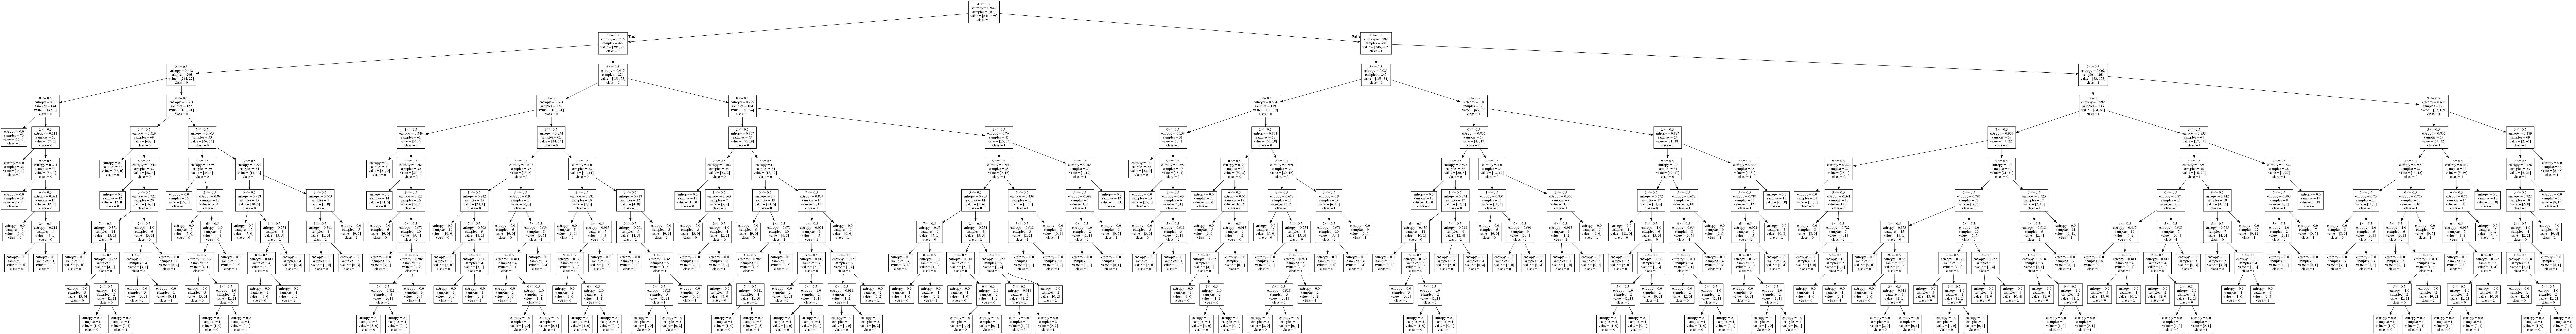

In [7]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=range(0,10))
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())